In [220]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import sys


In [221]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [222]:
# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [223]:
train = pd.read_csv(r"C:\Users\rajireddy\Desktop\NIDS\Dataset\Train_data.csv")
#test = pd.read_csv(r"C:\Users\rajireddy\Desktop\NIDS\Dataset\Test_data.csv")

In [224]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [225]:
print(train.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [226]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [227]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Count')

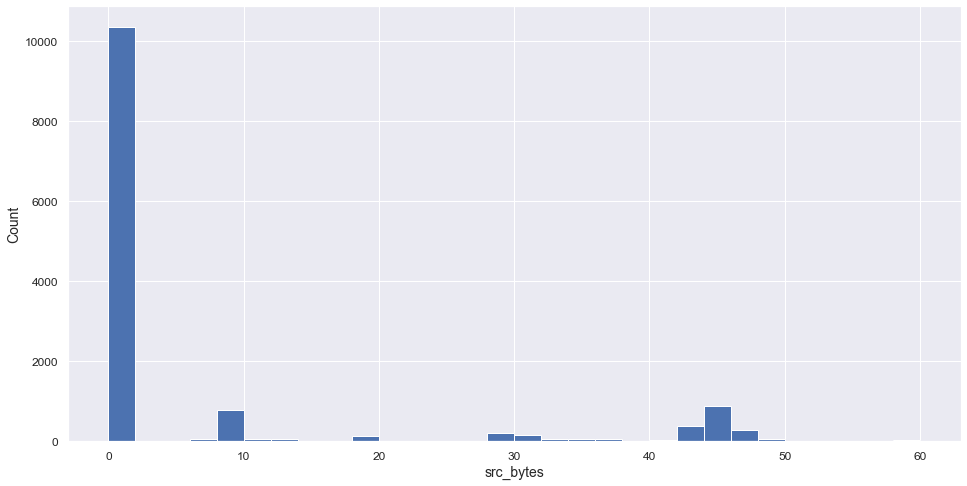

In [228]:
plt.figure(figsize=(16, 8))
train.src_bytes.hist(bins=30, range=(0, 60))
plt.xlabel("src_bytes")
plt.ylabel("Count")

In [229]:
print(train['num_outbound_cmds'].value_counts())
#print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


In [230]:
print(train['is_host_login'].value_counts())
#print(test['is_host_login'].value_counts())

0    25192
Name: is_host_login, dtype: int64


In [231]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.drop(['is_host_login'], axis=1, inplace=True)
#test.drop(['num_outbound_cmds'], axis=1, inplace=True)
#test.drop(['is_host_login'], axis=1, inplace=True)
#test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [232]:
# Attack Class Distribution
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
#sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))



In [234]:
type(sc_train)

numpy.ndarray

In [235]:
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)

#sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [236]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
#cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
#testcat = cattest.apply(encoder.fit_transform)
traincat['class'].replace(to_replace=['anamoly', 'normal'], value=[0, 1])


# separate target column from encoded data 
train_y = traincat['class']
#print(train_y)

enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()

In [237]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
#externalTest_x=pd.concat([sc_testdf,testcat],axis=1)
train_x.shape

(25192, 39)

In [238]:
#test_df = pd.concat([sc_testdf,testcat],axis=1)
#test_df.shape

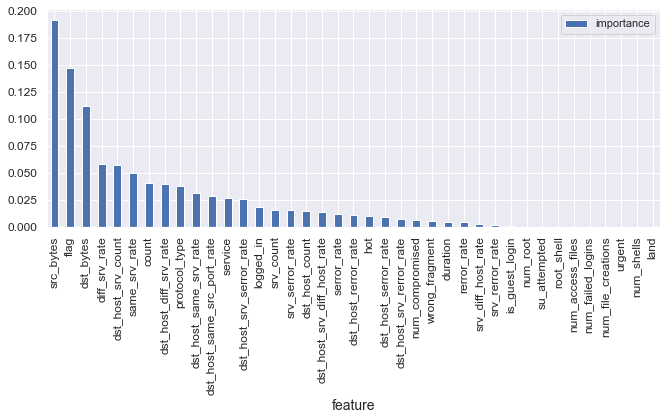

In [239]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [240]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)
print(rfe)
# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

print(selected_features)

RFE(estimator=RandomForestClassifier(), n_features_to_select=15)
['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'protocol_type', 'service', 'flag']


In [241]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

In [242]:
print(X_train)

       duration  src_bytes  dst_bytes     land  wrong_fragment    urgent  \
1312  -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
536   -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
12385 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
24516 -0.113551  -0.010092  -0.039310 -0.00891       -0.091223 -0.006301   
19896 -0.113551  -0.009973  -0.032623 -0.00891       -0.091223 -0.006301   
...         ...        ...        ...      ...             ...       ...   
18898 -0.113551  -0.009968  -0.034660 -0.00891       -0.091223 -0.006301   
11798 -0.113551  -0.010089  -0.037734 -0.00891       -0.091223 -0.006301   
6637  -0.113551  -0.009970  -0.032690 -0.00891       -0.091223 -0.006301   
2575  -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
23720 -0.113551  -0.010081  -0.039310 -0.00891       11.437678 -0.006301   

            hot  num_failed_logins  logged_in  num_compromised  root_shell  \
1312  -0.

In [243]:
print(X_test)

       duration  src_bytes  dst_bytes     land  wrong_fragment    urgent  \
2900  -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
11640 -0.113551  -0.010081  -0.039310 -0.00891       11.437678 -0.006301   
16662 -0.113551  -0.010089  -0.039310 -0.00891       -0.091223 -0.006301   
21545 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
8384  -0.113551  -0.010011  -0.022840 -0.00891       -0.091223 -0.006301   
...         ...        ...        ...      ...             ...       ...   
19427  1.344107  -0.009893  -0.000685 -0.00891       -0.091223 -0.006301   
14558 -0.113551  -0.010000  -0.024979 -0.00891       -0.091223 -0.006301   
17698  4.368485  -0.009546   0.070576 -0.00891       -0.091223 -0.006301   
23808 -0.113551  -0.009964  -0.020982 -0.00891       -0.091223 -0.006301   
21860 -0.113551  -0.009999   0.006238 -0.00891       -0.091223 -0.006301   

            hot  num_failed_logins  logged_in  num_compromised  root_shell  \
2900  -0.

In [244]:
print(Y_train)

1312     0
536      0
12385    0
24516    0
19896    1
        ..
18898    1
11798    1
6637     1
2575     0
23720    0
Name: class, Length: 17634, dtype: int32


In [245]:
print(Y_test)

2900     0
11640    0
16662    0
21545    0
8384     1
        ..
19427    1
14558    1
17698    1
23808    1
21860    1
Name: class, Length: 7558, dtype: int32


In [246]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [257]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
#models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_test, Y_test, cv=10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))#(TP+TN)/ (TP+FN+TN+FP)
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))#tp fp fn tn
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9075184834787482

Model Accuracy:
 0.906721354855782

Confusion matrix:
 [[2981  517]
 [ 188 3872]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      3498
           1       0.88      0.95      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.992854690073233

Model Accuracy:
 0.9953691452765282

Confusion matrix:
 [[3482   16]
 [  19 4041]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3498
           1       1.00      1.00      1

In [258]:
from sklearn.ensemble import VotingClassifier
#create our voting classifier, inputting our models
ensemble = VotingClassifier(models, voting='hard')

In [259]:
#fit model to training data
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('Naive Baye Classifier', BernoulliNB()),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('LogisticRegression',
                              LogisticRegression(n_jobs=-1, random_state=0))])

In [260]:
scores = cross_val_score(ensemble, X_test, Y_test, cv=10)
accuracy = metrics.accuracy_score(Y_test, ensemble.predict(X_test))
confusion_matrix = metrics.confusion_matrix(Y_test, ensemble.predict(X_test))
classification = metrics.classification_report(Y_test, ensemble.predict(X_test))
print()
print('============================== Ensemble Model Evaluation ==============================')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


============================== Ensemble Model Evaluation ==============================

Cross Validation Mean Score:
 0.9714236658607518

Model Accuracy:
 0.9727441121989945

Confusion matrix:
 [[3356  142]
 [  64 3996]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      3498
           1       0.97      0.98      0.97      4060

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558




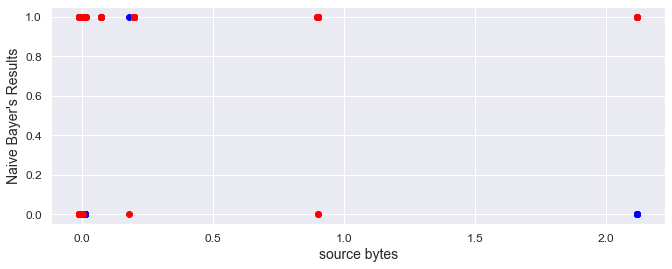

In [261]:
plt.scatter(X_test.src_bytes,Y_test,color='blue')
plt.scatter(X_test.src_bytes,BNB_Classifier.predict(X_test),color='red')
plt.xlabel("source bytes")
plt.ylabel("Naive Bayer's Results")
plt.show()

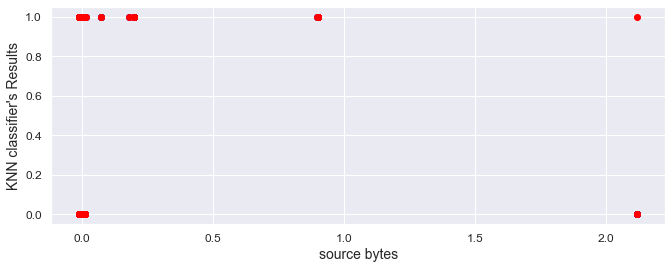

In [262]:
plt.scatter(X_test.src_bytes,Y_test,color='blue')
plt.scatter(X_test.src_bytes,KNN_Classifier.predict(X_test),color='red')
plt.xlabel("source bytes")
plt.ylabel("KNN classifier's Results")
plt.show()

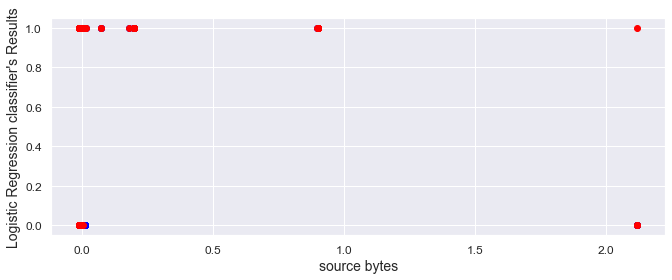

In [263]:
plt.scatter(X_test.src_bytes,Y_test,color='blue')
plt.scatter(X_test.src_bytes,LGR_Classifier.predict(X_test),color='red')
plt.xlabel("source bytes")
plt.ylabel("Logistic Regression classifier's Results")
plt.show()

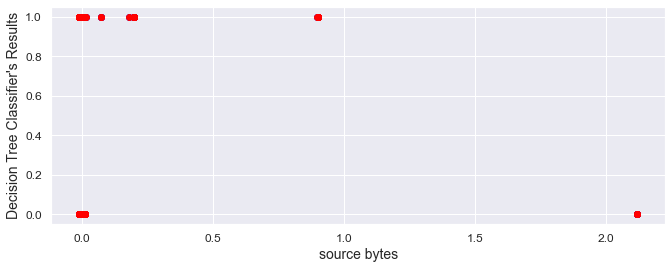

In [264]:
plt.scatter(X_test.src_bytes,Y_test,color='blue')
plt.scatter(X_test.src_bytes,DTC_Classifier.predict(X_test),color='red')
plt.xlabel("source bytes")
plt.ylabel("Decision Tree Classifier's Results")
plt.show()

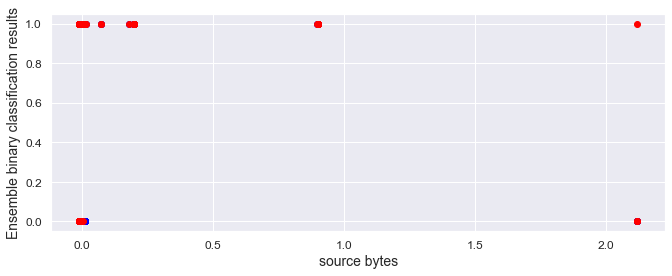

In [265]:
results=ensemble.predict(X_test)
plt.scatter(X_test.src_bytes,Y_test,color='blue')
plt.scatter(X_test.src_bytes,results,color='red')
plt.xlabel("source bytes")
plt.ylabel("Ensemble binary classification results")
plt.show()

In [266]:
from sklearn.ensemble import AdaBoostClassifier
AdaModel = AdaBoostClassifier(base_estimator=ensemble,algorithm='SAMME',n_estimators=100,learning_rate=1)
finalresult=AdaModel.fit(X_train,Y_train)
y_pred=finalresult.predict(X_test)
print(metrics.accuracy_score(Y_test,y_pred))

0.9973537973008733


In [ ]:
scores = cross_val_score(AdaModel, X_test, Y_test, cv=10)
accuracy = metrics.accuracy_score(Y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
classification = metrics.classification_report(Y_test,y_pred)
print()
print('============================== Ensembler and AdaBoosting Model Evaluation ==============================')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()